# Sentiment Analysis Naive Bayes

Bayes theorem is one of the most popular machine learning concepts that helps to calculate the probability of occurring one event with uncertain knowledge while other one has already occurred.

Bayes' theorem can be derived using product rule and conditional probability of event X with known event Y:

### Probability and Bayes’ Rule
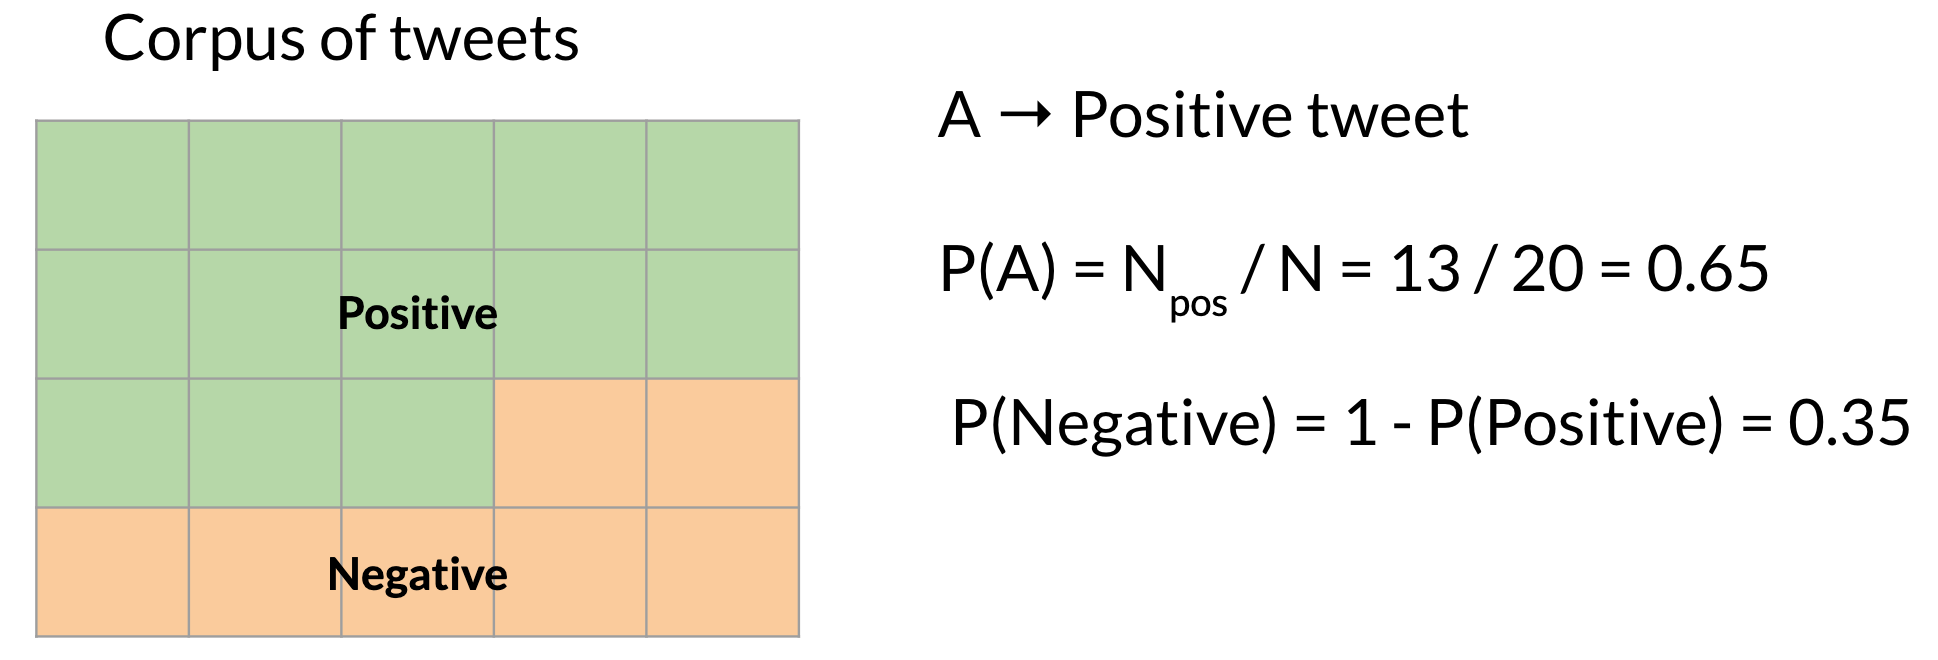

To calculate a probability of a certain event happening, you take the count of that specific event and you divide by the sum of all events. Furthermore, the sum of all probabilities has to equal 1. 

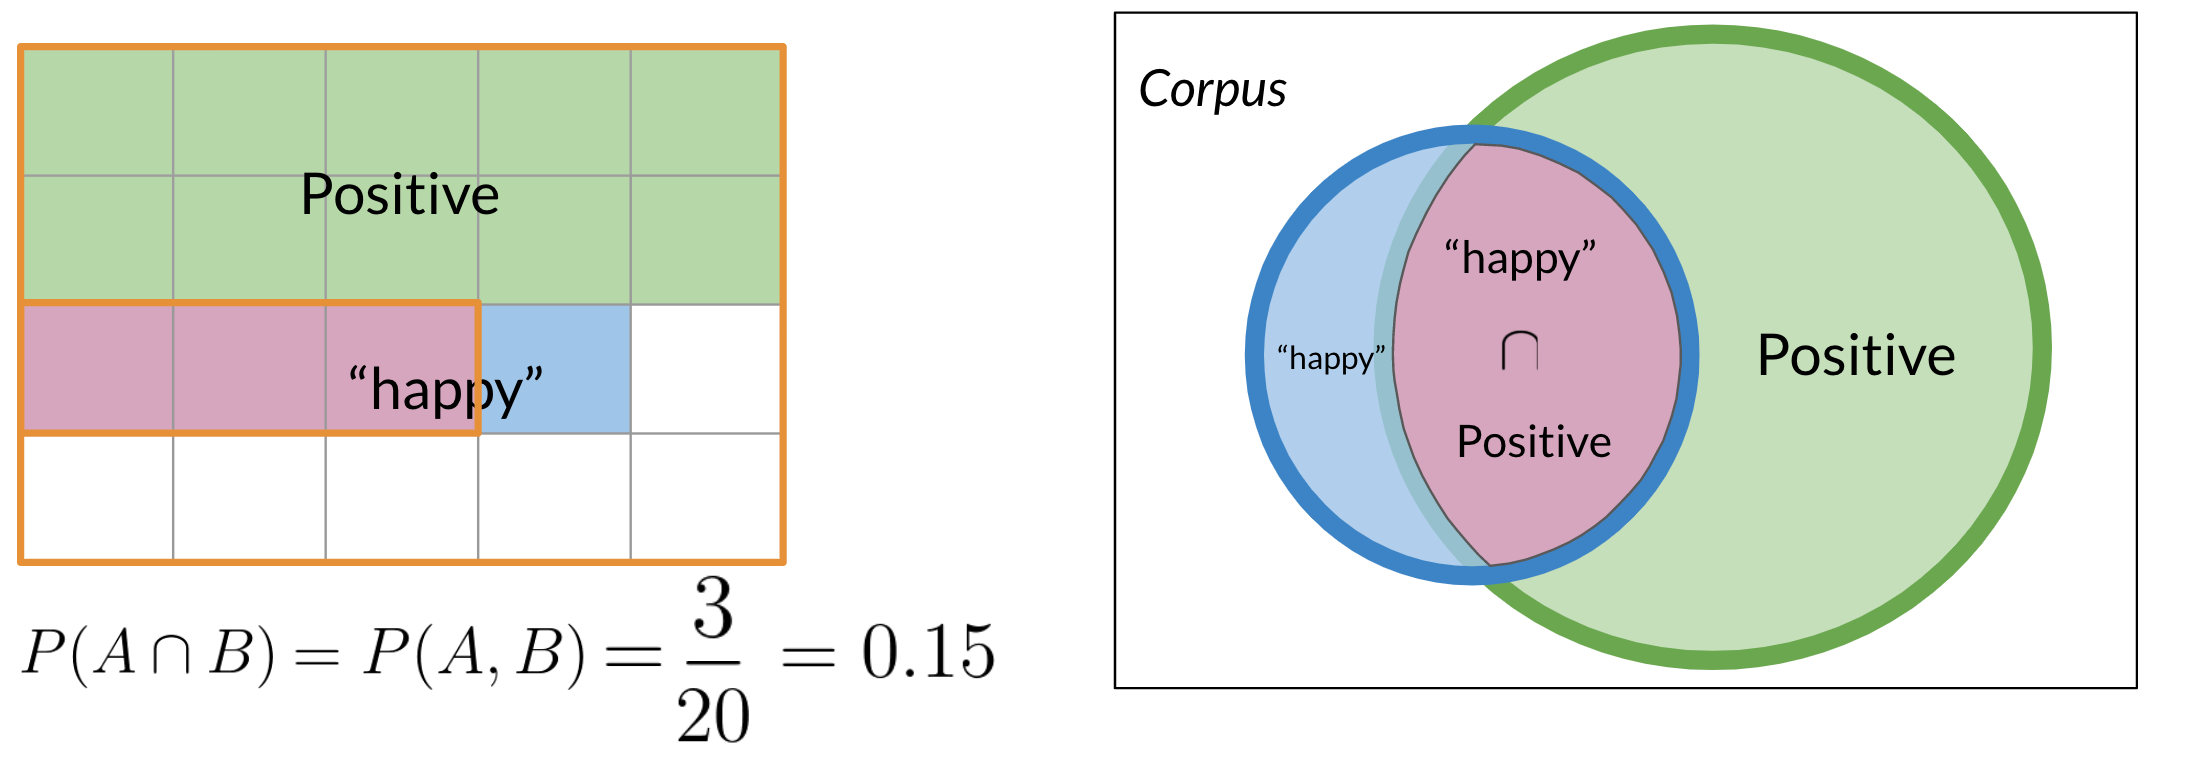

To compute the probability of 2 events happening, like "happy" and "positive" in the picture above, you would be looking at the intersection, or overlap of events. In this case red and blue boxes overlap in 3 boxes. So the answer is 3/20.

## Laplacian Smoothing

We usually compute the probability of a word given a class as follows:

P(wi∣ class )= freq (wi, class )Nclass  class ∈{ Positive, Negative }P(wi​∣ class )=Nclass ​ freq (wi​, class )​ class ∈{ Positive, Negative }

However, if a word does not appear in the training, then it automatically gets a probability of 0, to fix this we add smoothing as follows

P(wi∣class)=freq⁡(wi, class )+1(Nclass +V)P(wi​∣class)=(Nclass ​+V)freq(wi​, class )+1​

Note that we added a 11 in the numerator, and since there are VV words to normalize, we add VV in the denominator. 

NclassNclass​: frequency of all words in class

VV: number of unique words in vocabulary



## Log Likelihood

To compute the log likelihood, we need to get the ratios and use them to compute a score that will allow us to decide whether a tweet is positive or negative. The higher the ratio, the more positive the word is:

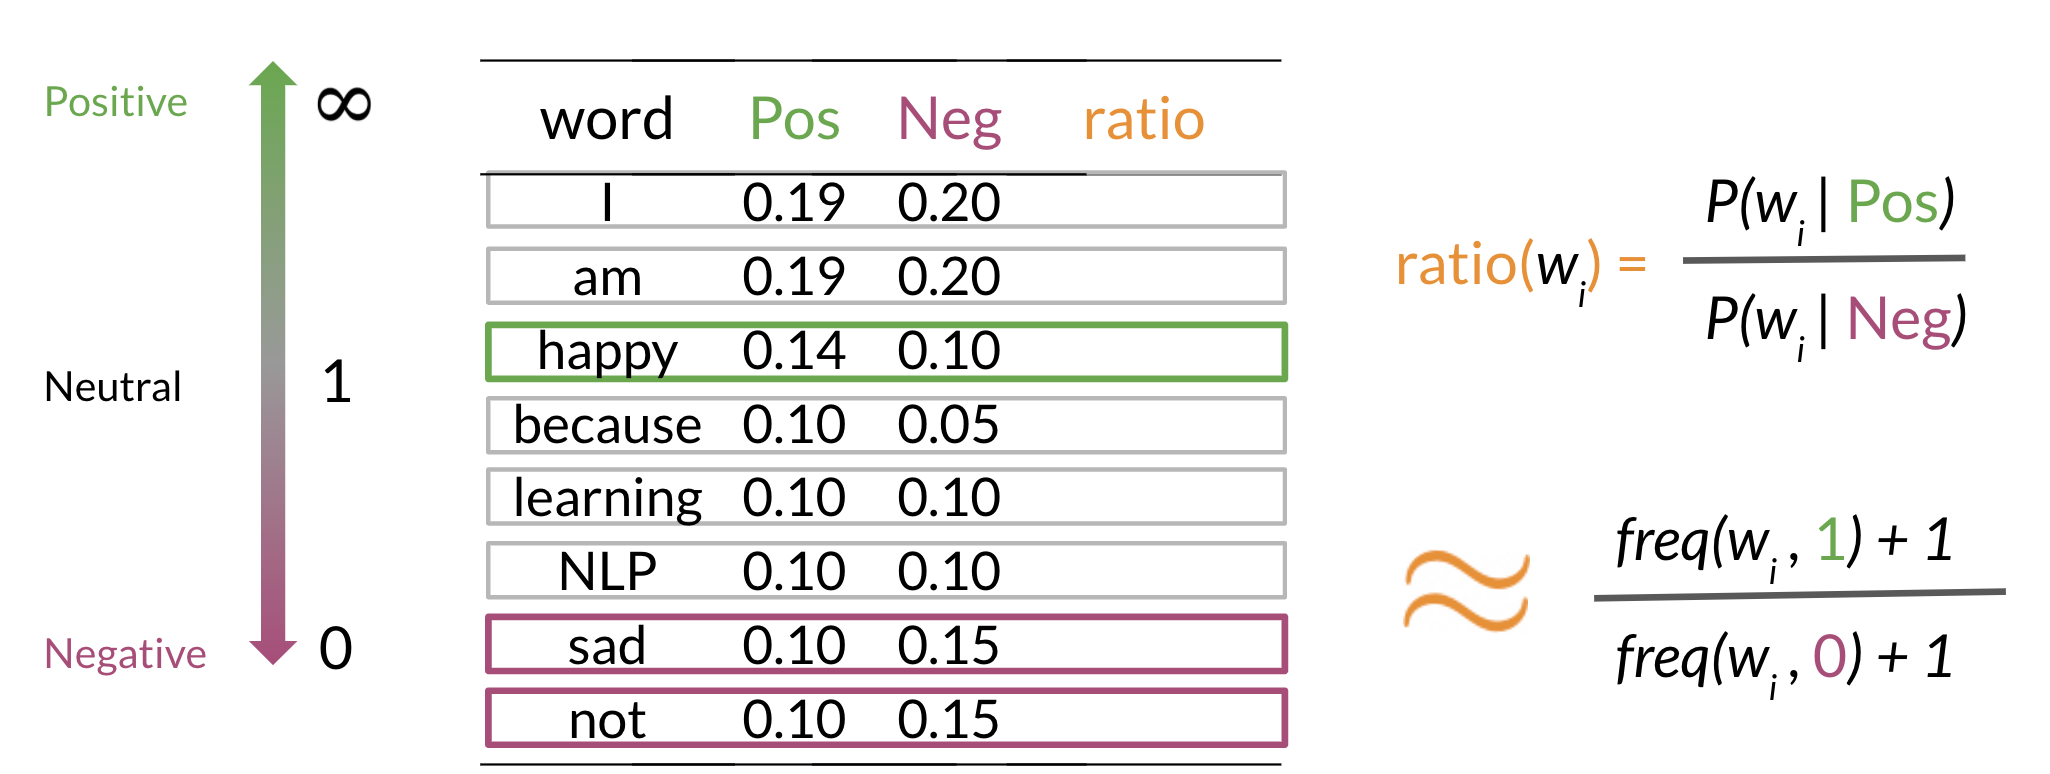

## Log Likelihood Part 2

Once you computed the λλ dictionary, it becomes straightforward to do inference: 

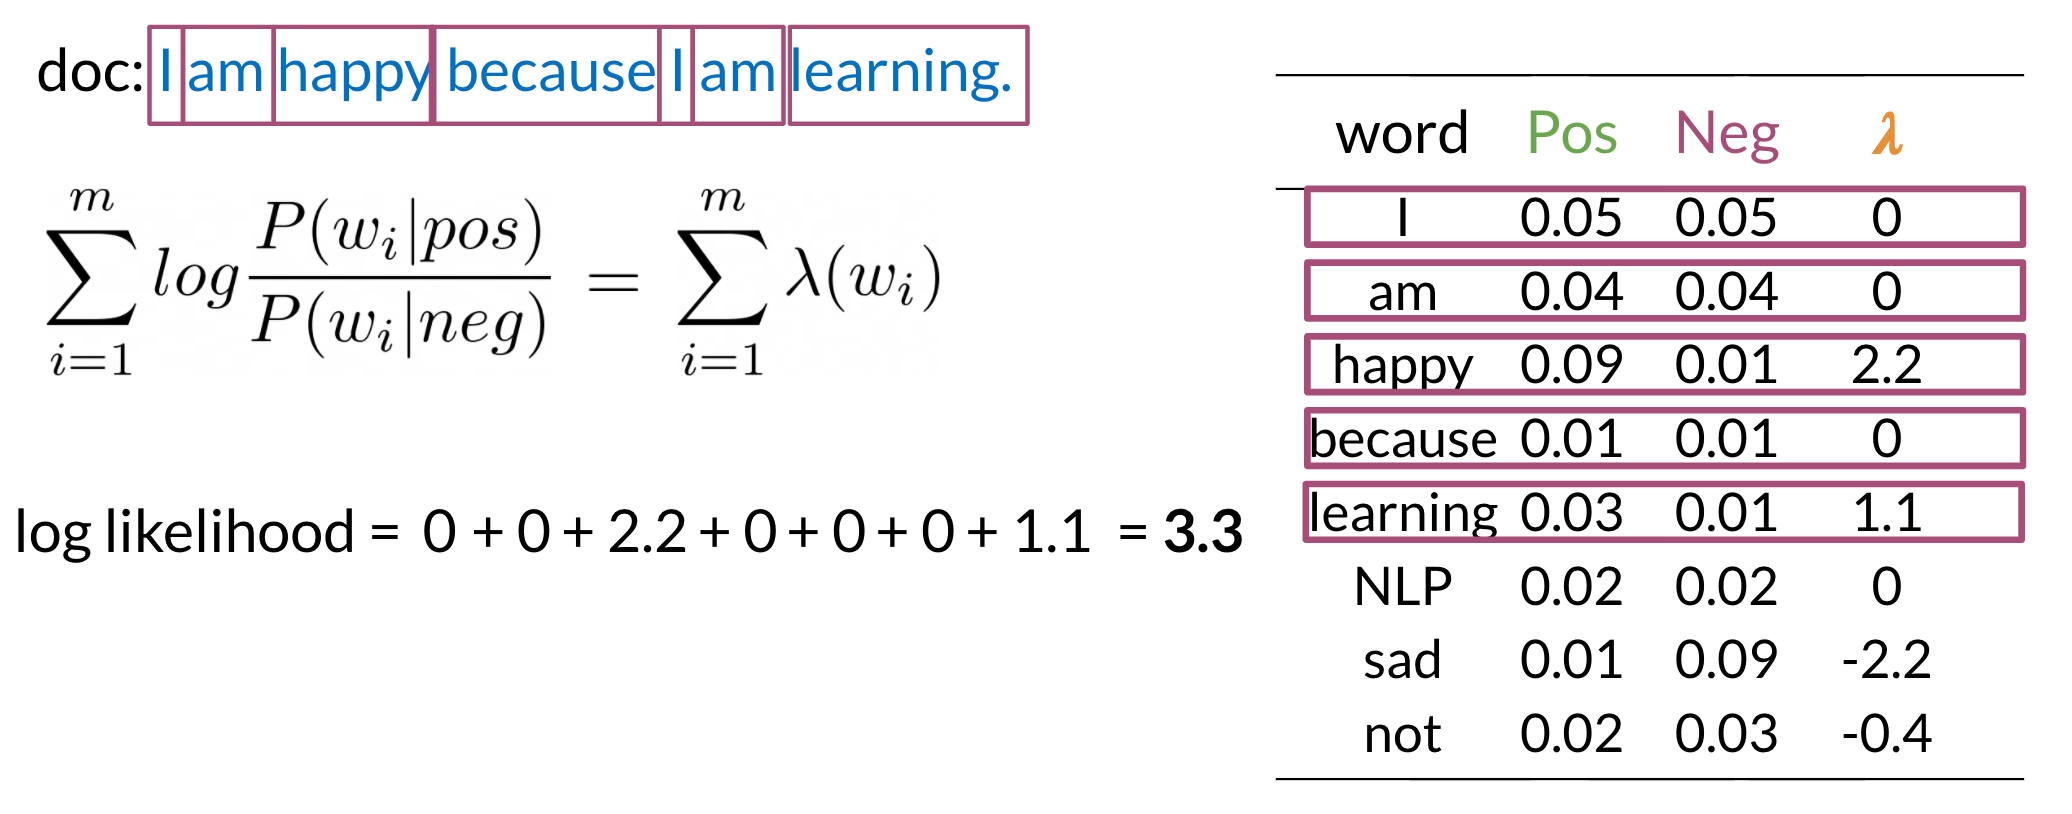

As you can see above, since 3.3>03.3>0 , we will classify the document to be positive. If we got a negative number we would have classified it to the negative class. 



## Training naïve Bayes

To train your naïve Bayes classifier, you have to perform the following steps:
1) Get or annotate a dataset with positive and negative tweets
2) Preprocess the tweets: process_tweet(tweet) ➞ [w1, w2, w3, ...]:

    Lowercase

    Remove punctuation, urls, names

    Remove stop words

    Stemming

    Tokenize sentences

3) Compute freq(w, class):
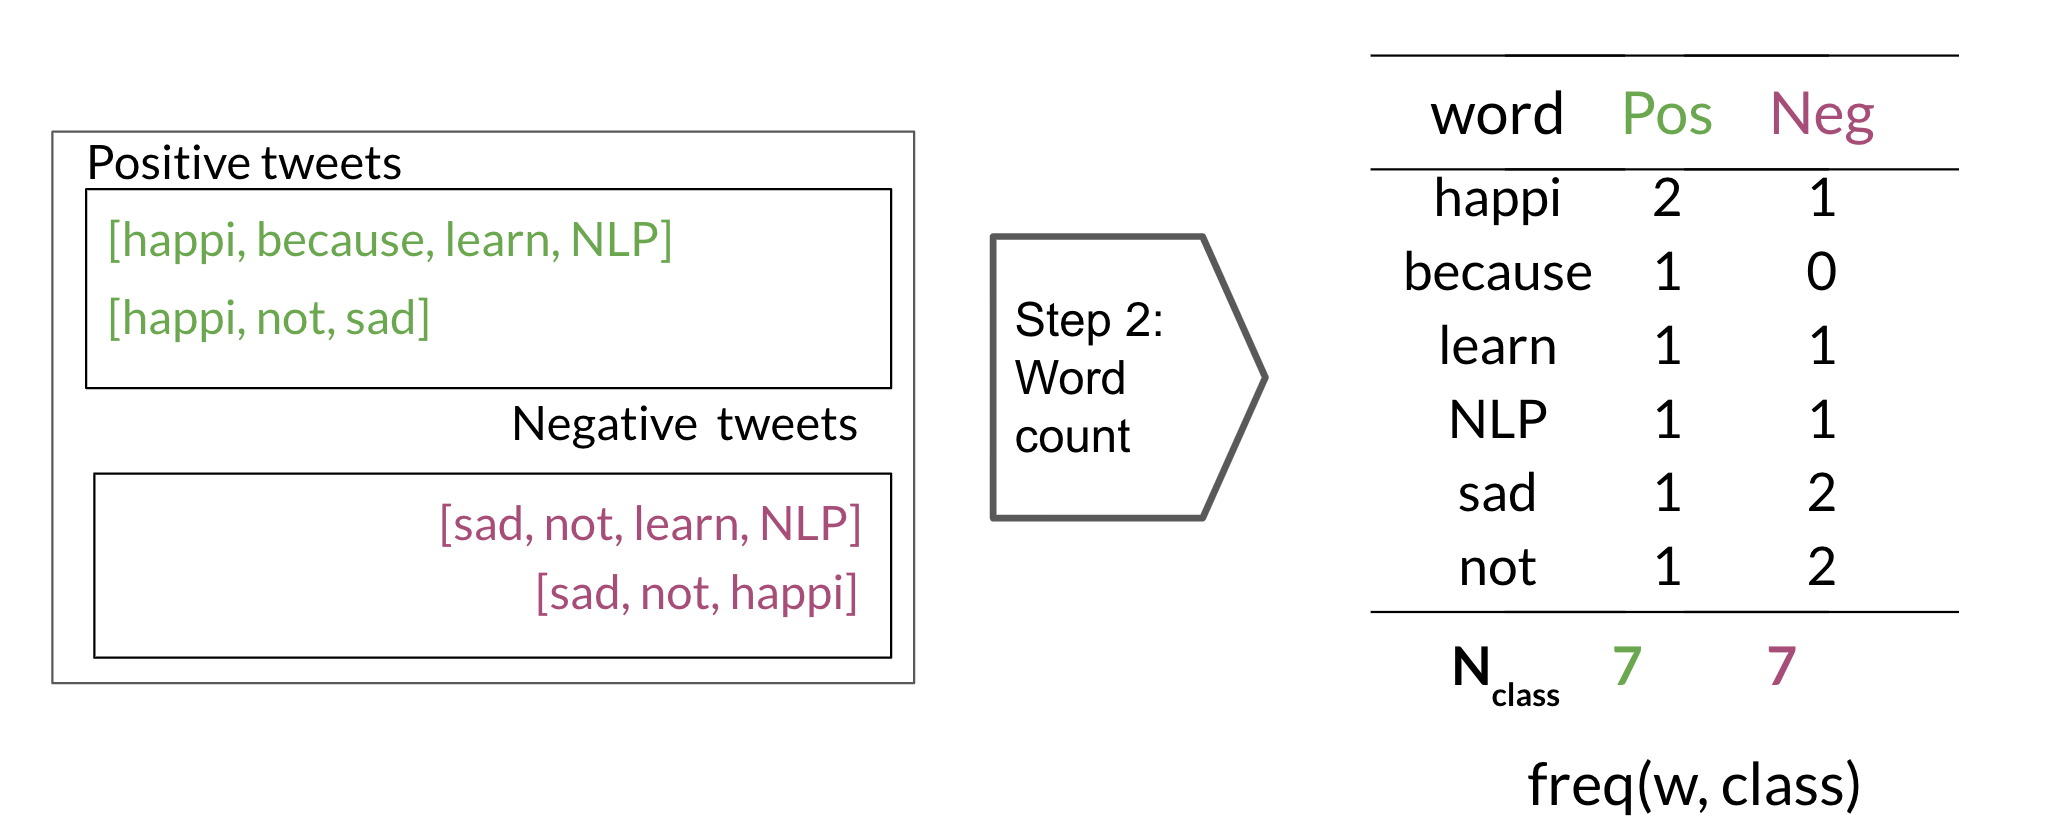

4) Get P(w∣pos),P(w∣neg) P(w∣pos),P(w∣neg) 

You can use the table above to compute the probabilities.

5) Get λ(w)λ(w)

λ(w)=log⁡P(w∣pos)P(w∣neg)λ(w)=logP(w∣neg)P(w∣pos)​

6) Compute logprior=log⁡(P(pos)/P(neg))logprior=log(P(pos)/P(neg))

 logprior =log⁡DposDneg logprior =logDneg​Dpos​​, where DposDpos​ and DnegDneg​ correspond to the number of positive and negative documents respectively. 

## Testing naïve Bayes

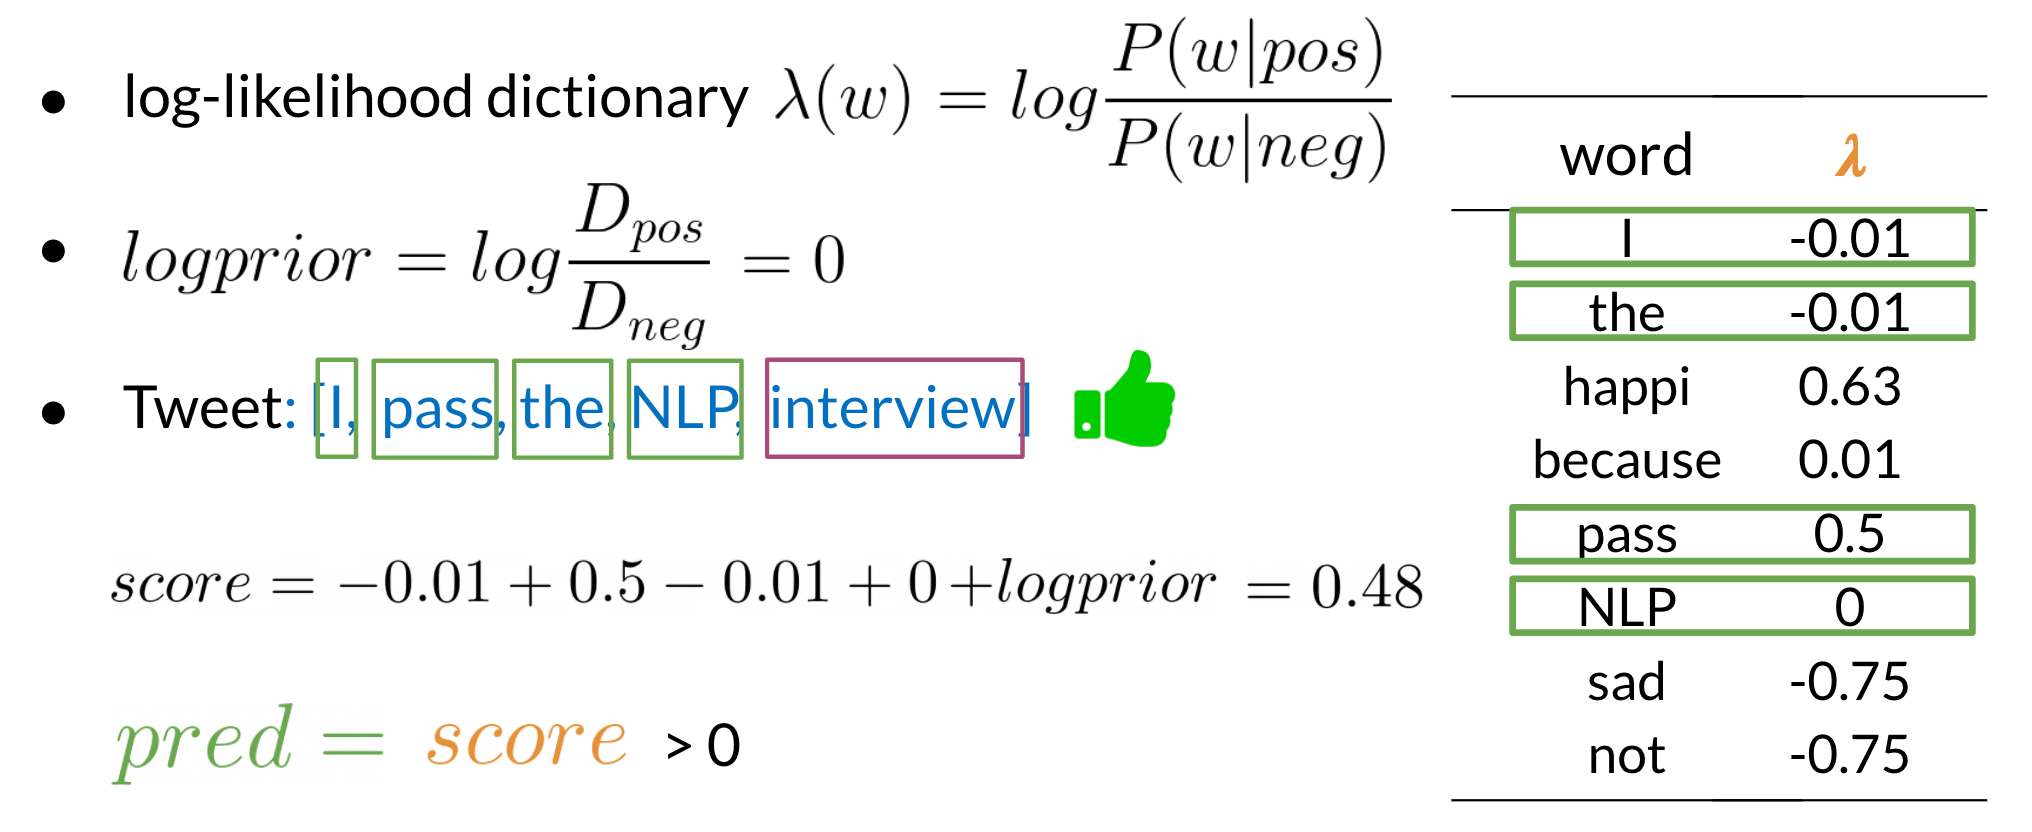

The example above shows how you can make a prediction given your λλ dictionary. In this example the logpriorlogprior is 0 because we have the same amount of positive and negative documents (i.e. log⁡1=0log1=0). 

In [2]:
# Let's dive into code.

def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0
    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)
    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:
            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs.get(pair, 1)
        # else, the label is negative
        else:
            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs.get(pair, 1)
    # Calculate D, the number of documents
    D = len(train_y)
    # Calculate D_pos, the number of positive documents (*hint: use sum(<np_array>))
    D_pos = sum(train_y)
    # Calculate D_neg, the number of negative documents (*hint: compute using D and D_pos)
    D_neg = D-D_pos
    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word, 1),0)
        freq_neg = freqs.get((word, 0),0)
        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1)/(N_pos + V)
        p_w_neg = (freq_neg + 1)/(N_neg + V)
        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
    return logprior, loglikelihood
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)

### Predicting using Naive Bayes

In order to predict the sentiment of a tweet we simply have to sum up the loglikelihood of the words in the tweet along with the logprior. If the value is positive then the tweet shows positive sentiment but if the value is negative then the tweet shows negative sentiment.

So let's write the predicting ( takes in a tweet, loglikelihood, and logprior and returns the prediction) and a testing function ( to test the model using the test data set).

In [ ]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)'''
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)# initialize probability to zero
    p = 0# add the logprior
    p += logpriorfor word in word_l: # check if the word exists in the loglikelihood dictionary
    if word in loglikelihood:
            # add the log likelihood of that word to the probability
        p += loglikelihood[word]
        return pdef test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of tweets
        test_y: the corresponding labels for the list of tweets
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of tweets classified correctly)/(total # of tweets)
    """
    accuracy = 0  # return this properlyy_hats = []
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0# append the predicted class to the list y_hats
        y_hats.append(y_hat_i)
    
    # error is the average of the absolute values of the differences between y_hats and test_y
    error = np.mean(np.absolute(y_hats - test_y))# Accuracy is 1 minus the error
    accuracy = 1 - errorreturn accuracy